In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Inspecting the data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df_new=df
df_new=df.drop(['car_ID','symboling','CarName'], axis='columns') #dropping columns which have non-numeric data and are of no use
df_new.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df['drivewheel'].value_counts() #counts occurence of each unique value
dummies = pd.get_dummies(df.drivewheel,dtype=int) #creates new dataframe of binary variables
dummies

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
200,0,0,1
201,0,0,1
202,0,0,1
203,0,0,1


In [12]:
merged = pd.concat([df_new,dummies], axis='columns')
merged.head() #merge with the df_new dataframe

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,4wd,fwd,rwd
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,0,0,1
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,0,0,1
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,0,0,1
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,0,1,0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0


In [13]:
df_final=merged.drop(['drivewheel'], axis='columns')
df_final # dropping drivewheel column

,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,4wd,fwd,rwd
0,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,13495.0,0,0,1
1,gas,std,two,convertible,front,88.6,168.8,64.1,48.8,2548,...,2.68,9.0,111,5000,21,27,16500.0,0,0,1
2,gas,std,two,hatchback,front,94.5,171.2,65.5,52.4,2823,...,3.47,9.0,154,5000,19,26,16500.0,0,0,1
3,gas,std,four,sedan,front,99.8,176.6,66.2,54.3,2337,...,3.40,10.0,102,5500,24,30,13950.0,0,1,0
4,gas,std,four,sedan,front,99.4,176.6,66.4,54.3,2824,...,3.40,8.0,115,5500,18,22,17450.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,front,109.1,188.8,68.9,55.5,2952,...,3.15,9.5,114,5400,23,28,16845.0,0,0,1
201,gas,turbo,four,sedan,front,109.1,188.8,68.8,55.5,3049,...,3.15,8.7,160,5300,19,25,19045.0,0,0,1
202,gas,std,four,sedan,front,109.1,188.8,68.9,55.5,3012,...,2.87,8.8,134,5500,18,23,21485.0,0,0,1
203,diesel,turbo,four,sedan,front,109.1,188.8,68.9,55.5,3217,...,3.40,23.0,106,4800,26,27,22470.0,0,0,1


In [17]:
def encode_concat(df, columns_to_encode):
    for column in columns_to_encode:
        dummies = pd.get_dummies(df[column], dtype=int, prefix=column) #generates new dataframe of dummy (binary) columns with same name as categorical column
        df = pd.concat([df, dummies], axis='columns') # merges with above final dataset
        df = df.drop([column, dummies.columns[0]], axis='columns') # drops the categorical columns
    return df

columns_to_encode = [
    'fueltype',
    'aspiration',
    'doornumber',
    'carbody',
    'enginelocation',
    'enginetype',
    'cylindernumber',
    'fuelsystem'
]

df_encoded = encode_concat(df_final , columns_to_encode)
df_encoded.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [18]:
y=df_encoded.price # target value
x=df_encoded.drop(['price'], axis='columns') # all features except price (which is the target value)
x_mean=x.mean()
x_std=x.std()
x_standardized=(x-x_mean)/(x_std) # feature scaling is used (z score normalization)
y_mean=y.mean()
y_std=y.std()
y_standardized=(y-y_mean)/(y_std)



In [23]:
# Linear Regression using Gradient Descent

def model(X, Y, learning_rate, iteration):
    theta = np.zeros((X.shape[1], 1))
    Y = np.array(Y).reshape(-1, 1)
    X = np.array(X)
    m = Y.size
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y)) # Mean Squared Error Cost Function 
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)

        if(i%(iteration/10) == 0):
            print("Cost at iteration", i, "is:", cost)
    return theta, cost_list, y_pred

In [24]:
iteration = 1000
learning_rate = 0.1
theta, cost_list, y_pred= model(y_standardized,x_standardized, learning_rate, iteration)

Cost at iteration 0 is: 0.497560975609756
Cost at iteration 100 is: 0.037314951817693544
Cost at iteration 200 is: 0.03275747290166322
Cost at iteration 300 is: 0.03153727491532228
Cost at iteration 400 is: 0.03105491684601322
Cost at iteration 500 is: 0.030802690335449395
Cost at iteration 600 is: 0.030647012760612703
Cost at iteration 700 is: 0.030541560470274995
Cost at iteration 800 is: 0.03046582204651618
Cost at iteration 900 is: 0.03040908493851179


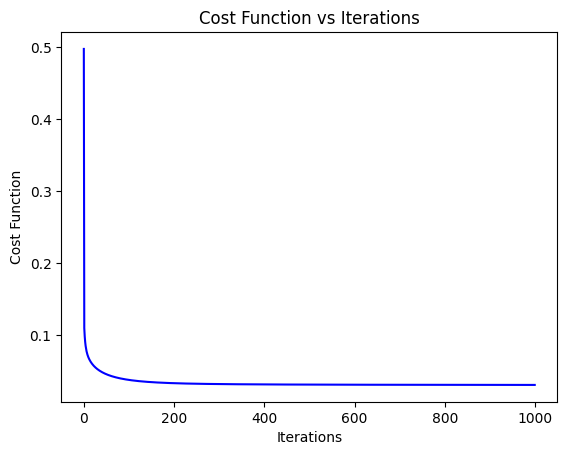

In [26]:


# Plotting the cost function vs iterations
plt.plot(range(iteration), cost_list, color='blue')
plt.title('Cost Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y.values, y_pred, color='black', label='Actual Prices')
# Adding regression line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='Regression Line') 

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Compute R^2 score
def r2_score_manual(y_true, y_pred):
    """
    Compute the R^2 score manually
    """
    ss_total = np.sum(np.square(y_true - np.mean(y_true)))
    ss_residual = np.sum(np.square(y_true - y_pred))
    r2 = 1 - (ss_residual / ss_total)
    return r2

# R^2 score for the test set
r2 = r2_score_manual(y_test, y_pred)
print(f'R^2 score: {r2:.4f}')